# Loading data

## Question 1: a. Programmatically download and load into your favorite analytical tool the transactions data.


In [1]:
import pandas as pd
import requests
import zipfile
import io
import os

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# Define the URL for the ZIP file
url = "https://github.com/CapitalOneRecruiting/DS/blob/master/transactions.zip?raw=true"

# Download the ZIP file
response = requests.get(url)
if response.status_code == 200:
    # Step 3: Extract the ZIP file in memory
    with zipfile.ZipFile(io.BytesIO(response.content)) as z:
        # Extract all contents to the current directory
        z.extractall()
        print("ZIP file extracted successfully.")
else:
    print(f"Failed to download data. Status code: {response.status_code}")
    exit()

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)


ZIP file extracted successfully.


In [3]:
# Load the JSON data into a DataFrame
filename = "transactions.txt"
if os.path.exists(filename):
    df = pd.read_json(filename, lines=True)
    print("Data successfully loaded into a DataFrame!")
    df.replace("", pd.NA, inplace=True)
else:
    print(f"The file {filename} does not exist.")


Data successfully loaded into a DataFrame!


In [4]:
df

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.00,2016-08-13T14:27:32,98.55,Uber,US,US,02,01,rideshare,06/2023,2015-03-14,2015-03-14,414,414,1803,PURCHASE,<NA>,0.00,NaN,NaN,NaN,False,NaN,NaN,False,False
1,737265056,737265056,5000,5000.00,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,01,entertainment,02/2024,2015-03-14,2015-03-14,486,486,767,PURCHASE,<NA>,0.00,NaN,NaN,NaN,True,NaN,NaN,False,False
2,737265056,737265056,5000,5000.00,2016-11-08T09:18:39,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,<NA>,0.00,NaN,NaN,NaN,False,NaN,NaN,False,False
3,737265056,737265056,5000,5000.00,2016-12-10T02:14:50,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,<NA>,0.00,NaN,NaN,NaN,False,NaN,NaN,False,False
4,830329091,830329091,5000,5000.00,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,01,fastfood,10/2029,2015-08-06,2015-08-06,885,885,3143,PURCHASE,<NA>,0.00,NaN,NaN,NaN,True,NaN,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,732852505,732852505,50000,48904.96,2016-12-22T18:44:12,119.92,Lyft,US,US,90,01,rideshare,12/2022,2012-08-23,2012-08-23,936,936,3783,PURCHASE,<NA>,1095.04,NaN,NaN,NaN,False,NaN,NaN,False,False
786359,732852505,732852505,50000,48785.04,2016-12-25T16:20:34,18.89,hulu.com,US,US,09,01,online_subscriptions,08/2023,2012-08-23,2012-08-23,939,939,3388,PURCHASE,<NA>,1214.96,NaN,NaN,NaN,False,NaN,NaN,False,False
786360,732852505,732852505,50000,48766.15,2016-12-27T15:46:24,49.43,Lyft,US,US,02,01,rideshare,08/2025,2012-08-23,2012-08-23,936,936,3783,PURCHASE,<NA>,1233.85,NaN,NaN,NaN,False,NaN,NaN,False,False
786361,732852505,732852505,50000,48716.72,2016-12-29T00:30:55,49.89,walmart.com,US,US,09,99,online_retail,07/2022,2012-08-23,2012-08-23,939,939,3388,PURCHASE,<NA>,1283.28,NaN,NaN,NaN,False,NaN,NaN,False,False


## b. Please describe the structure of the data. Number of records and fields in each record?

In [5]:
print(df.info())  # Display DataFrame info
print(df.head())  # Preview the first few rows of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             786363 non-null  int64  
 1   customerId                786363 non-null  int64  
 2   creditLimit               786363 non-null  int64  
 3   availableMoney            786363 non-null  float64
 4   transactionDateTime       786363 non-null  object 
 5   transactionAmount         786363 non-null  float64
 6   merchantName              786363 non-null  object 
 7   acqCountry                781801 non-null  object 
 8   merchantCountryCode       785639 non-null  object 
 9   posEntryMode              782309 non-null  object 
 10  posConditionCode          785954 non-null  object 
 11  merchantCategoryCode      786363 non-null  object 
 12  currentExpDate            786363 non-null  object 
 13  accountOpenDate           786363 non-null  o

In [6]:
df.columns

Index(['accountNumber', 'customerId', 'creditLimit', 'availableMoney',
       'transactionDateTime', 'transactionAmount', 'merchantName',
       'acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'currentExpDate', 'accountOpenDate',
       'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
       'transactionType', 'echoBuffer', 'currentBalance', 'merchantCity',
       'merchantState', 'merchantZip', 'cardPresent', 'posOnPremises',
       'recurringAuthInd', 'expirationDateKeyInMatch', 'isFraud'],
      dtype='object')

In [7]:
# converting date columns to datetime
df.transactionDateTime = pd.to_datetime(df.transactionDateTime)
df.accountOpenDate = pd.to_datetime(df.accountOpenDate)
df.dateOfLastAddressChange = pd.to_datetime(df.dateOfLastAddressChange)
df.currentExpDate = pd.to_datetime(df.currentExpDate)

C:\Users\wangj\AppData\Local\Temp\ipykernel_34776\3427329.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.currentExpDate = pd.to_datetime(df.currentExpDate)


### 29 features in the dataset:

   **Timestamp: 4 columns,**
   **Boolean : 3 columns,**
   **Categorical: 7 columns,**
   **Numerical: 9 columns**

**Dimension of the dataset is 786363 x 29.**

In [8]:
print("Dataset Dimensions: {} x {}".format(df.shape[0], df.shape[1])) # size of the dataset

Dataset Dimensions: 786363 x 29


## c.Please provide some additional basic summary statistics for each field. Be sure to include a count of null, minimum, maximum, and unique values where appropriate.

In [9]:
df.describe(include='int')


,accountNumber,customerId,creditLimit,cardCVV,enteredCVV,cardLast4Digits
count,7.863630e+05,7.863630e+05,786363.000000,786363.000000,786363.000000,786363.000000
mean,5.372326e+08,5.372326e+08,10759.464459,544.467338,544.183857,4757.417799
std,2.554211e+08,2.554211e+08,11636.174890,261.524220,261.551254,2996.583810
min,1.000881e+08,1.000881e+08,250.000000,100.000000,0.000000,0.000000
25%,3.301333e+08,3.301333e+08,5000.000000,310.000000,310.000000,2178.000000
50%,5.074561e+08,5.074561e+08,7500.000000,535.000000,535.000000,4733.000000
75%,7.676200e+08,7.676200e+08,15000.000000,785.000000,785.000000,7338.000000
max,9.993896e+08,9.993896e+08,50000.000000,998.000000,998.000000,9998.000000


In [10]:
df.describe(include='float')

,availableMoney,transactionAmount,currentBalance
count,786363.000000,786363.000000,786363.000000
mean,6250.725369,136.985791,4508.739089
std,8880.783989,147.725569,6457.442068
min,-1005.630000,0.000000,0.000000
25%,1077.420000,33.650000,689.910000
50%,3184.860000,87.900000,2451.760000
75%,7500.000000,191.480000,5291.095000
max,50000.000000,2011.540000,47498.810000


In [11]:
df.describe(include='object')


,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,transactionType,echoBuffer,merchantCity,merchantState,merchantZip,posOnPremises,recurringAuthInd
count,786363,781801,785639,782309,785954,786363,785665,0,0,0,0,0,0
unique,2490,4,4,5,3,19,3,0,0,0,0,0,0
top,Uber,US,US,05,01,online_retail,PURCHASE,NaN,NaN,NaN,NaN,NaN,NaN
freq,25613,774709,778511,315035,628787,202156,745193,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.describe(include='bool')

,cardPresent,expirationDateKeyInMatch,isFraud
count,786363,786363,786363
unique,2,2,2
top,False,False,False
freq,433495,785320,773946


In [13]:
df.describe(include='datetime')

,transactionDateTime,currentExpDate,accountOpenDate,dateOfLastAddressChange
count,786363,786363,786363,786363
mean,2016-07-06 01:58:58.395681536,2026-09-25 23:50:42.724542720,2014-02-03 01:11:17.352825856,2015-04-14 06:46:41.127723520
min,2016-01-01 00:01:02,2019-12-01 00:00:00,1989-08-22 00:00:00,1989-08-22 00:00:00
25%,2016-04-06 19:35:07,2023-05-01 00:00:00,2013-06-29 00:00:00,2014-10-08 00:00:00
50%,2016-07-08 05:03:57,2026-10-01 00:00:00,2014-09-05 00:00:00,2016-01-13 00:00:00
75%,2016-10-05 13:52:03.500000,2030-03-01 00:00:00,2015-05-04 00:00:00,2016-06-06 00:00:00
max,2016-12-30 23:59:45,2033-08-01 00:00:00,2015-12-31 00:00:00,2016-12-30 00:00:00


### Check each column for Null values

### 11 features including at least 1 Null value. 6 features does not include any value in the dataset.

In [14]:
# Calculate the count of null values in each column
df.isnull().sum()

accountNumber                    0
customerId                       0
creditLimit                      0
availableMoney                   0
transactionDateTime              0
transactionAmount                0
merchantName                     0
acqCountry                    4562
merchantCountryCode            724
posEntryMode                  4054
posConditionCode               409
merchantCategoryCode             0
currentExpDate                   0
accountOpenDate                  0
dateOfLastAddressChange          0
cardCVV                          0
enteredCVV                       0
cardLast4Digits                  0
transactionType                698
echoBuffer                  786363
currentBalance                   0
merchantCity                786363
merchantState               786363
merchantZip                 786363
cardPresent                      0
posOnPremises               786363
recurringAuthInd            786363
expirationDateKeyInMatch         0
isFraud             

In [15]:
# Calculate the proportion of missing values for each variable
missing_values_ratio = df.isnull().mean().sort_values(ascending=False)

# Create a DataFrame for clarity
missing_values_summary = missing_values_ratio.reset_index()
missing_values_summary.columns = ['Variable', 'MissingValueProportion']
missing_values_summary 

,Variable,MissingValueProportion
0,recurringAuthInd,1.000000
1,posOnPremises,1.000000
2,merchantZip,1.000000
3,merchantState,1.000000
4,merchantCity,1.000000
5,echoBuffer,1.000000
6,acqCountry,0.005801
7,posEntryMode,0.005155
8,merchantCountryCode,0.000921
9,transactionType,0.000888


In [16]:
# drop fully non columns
df.drop(['echoBuffer','merchantCity','merchantState','merchantZip','posOnPremises','recurringAuthInd'],
                  axis=1,inplace=True) 

### I believe that the missing values in acqCountry, posEntryMode, merchantCountryCode, transactionType, and posConditionCode might contain information related to fraud.

In [17]:
# # Replace missing values with 'Missing' or -1 based on data type for specified columns
# columns_to_fill = {
#     'acqCountry': 'Missing',
#     'posEntryMode': -1,
#     'merchantCountryCode': 'Missing',
#     'transactionType': 'Missing',
#     'posConditionCode': -1
# }

# for column, fill_value in columns_to_fill.items():
#     df[column] = df[column].fillna(fill_value)

In [18]:
# Replace missing values with 'Missing' for all specified columns
columns_to_fill_with_missing = ['acqCountry', 'posEntryMode', 'merchantCountryCode', 'transactionType', 'posConditionCode']

for column in columns_to_fill_with_missing:
    df[column] = df[column].fillna('Missing')

# Exploratary Data Analysis

## Question 2: Plot Plot a histogram of the processed amounts of each transaction, the transactionAmount column.

In [19]:
# converting date columns to datetime
df.transactionDateTime = pd.to_datetime(df.transactionDateTime)
df.accountOpenDate = pd.to_datetime(df.accountOpenDate)
df.dateOfLastAddressChange = pd.to_datetime(df.dateOfLastAddressChange)
df.currentExpDate = pd.to_datetime(df.currentExpDate)

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

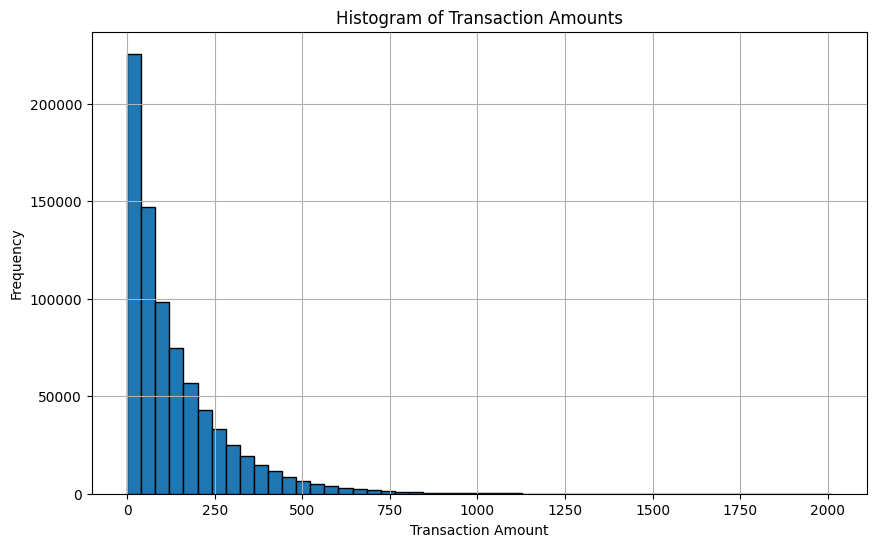

In [21]:
# Plot histogram of transaction amounts
plt.figure(figsize=(10, 6))
plt.hist(df['transactionAmount'], bins=50, edgecolor='k')
plt.title('Histogram of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Maximum transaction amount was $2011. Average of transaction amount is 136.98. Standard deviation of transaction amount was 147.72.

In [22]:
df.transactionAmount.describe()

count    786363.000000
mean        136.985791
std         147.725569
min           0.000000
25%          33.650000
50%          87.900000
75%         191.480000
max        2011.540000
Name: transactionAmount, dtype: float64

### This shows that there is right skewed distribution. Avg. of transaction amounts (136.98) is much higher than median of transaction amounts (87.90)

## Non-Fraudulent and Fraudulent Transactions

### Both distributions are right-skewed, meaning that most transaction amounts are small, with a few larger outliers.

### Fraudulent transactions tend to have a wider range and are slightly less concentrated around the smallest transaction amounts compared to non-fraudulent transactions.

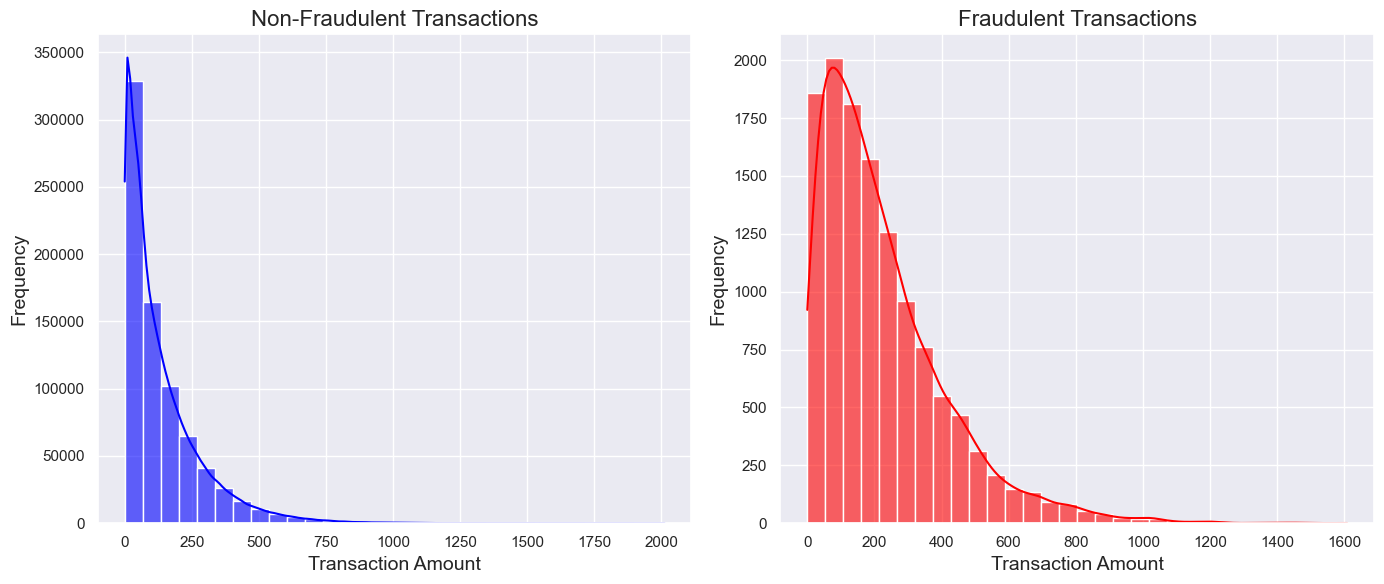

In [23]:
# Set the figure size and theme
plt.figure(figsize=(14, 6))
sns.set_theme()

# Plot histogram for non-fraudulent transactions
plt.subplot(1, 2, 1)  # First subplot
sns.histplot(
    data=df[df['isFraud'] == False],
    x='transactionAmount',
    bins=30,
    kde=True,
    color='blue',
    alpha=0.6
)
plt.title('Non-Fraudulent Transactions', fontsize=16)
plt.xlabel('Transaction Amount', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Plot histogram for fraudulent transactions
plt.subplot(1, 2, 2)  # Second subplot
sns.histplot(
    data=df[df['isFraud'] == True],
    x='transactionAmount',
    bins=30,
    kde=True,
    color='red',
    alpha=0.6
)
plt.title('Fraudulent Transactions', fontsize=16)
plt.xlabel('Transaction Amount', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

## Transaction Amount Distribution

### Transaction Amount contains some extreme values, but these outliers may be useful for the prediction model. 

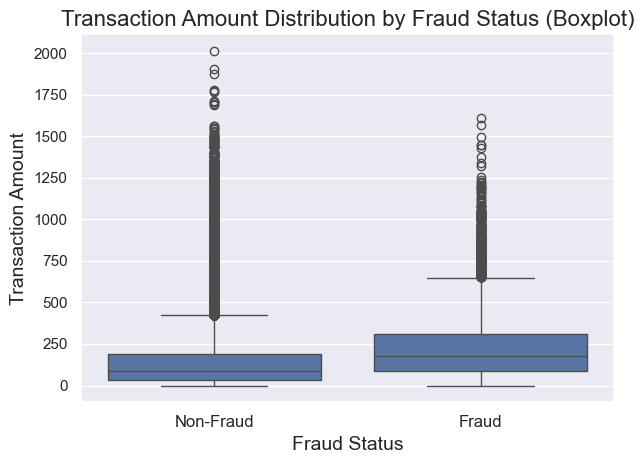

In [24]:
# Create a boxplot to visualize transaction distributions based on 'isFraud'
sns.boxplot(
    data=df,  # Use the correct dataset
    x='isFraud',
    y='transactionAmount',
)

# Enhance plot appearance
plt.title('Transaction Amount Distribution by Fraud Status (Boxplot)', fontsize=16)
plt.xlabel('Fraud Status', fontsize=14)
plt.ylabel('Transaction Amount', fontsize=14)
plt.xticks([0, 1], labels=['Non-Fraud', 'Fraud'], fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

### 83% of all transactions are less than 250$ in the dataset.

In [25]:
z=df[(df.transactionAmount < 250)]
round(len(z)/len(df),2)

0.83

### 10 different Credit Limits to its customers starting from 250 to $20000

In [26]:
# Credit Limit types
df.creditLimit.unique() 

array([ 5000,  2500, 50000, 15000, 10000,   250,   500,  1000,  7500,
       20000], dtype=int64)

### Top3  credit limit to Fraud : 5000, 15000 or 7500 

C:\Users\wangj\AppData\Local\Temp\ipykernel_34776\1720443362.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


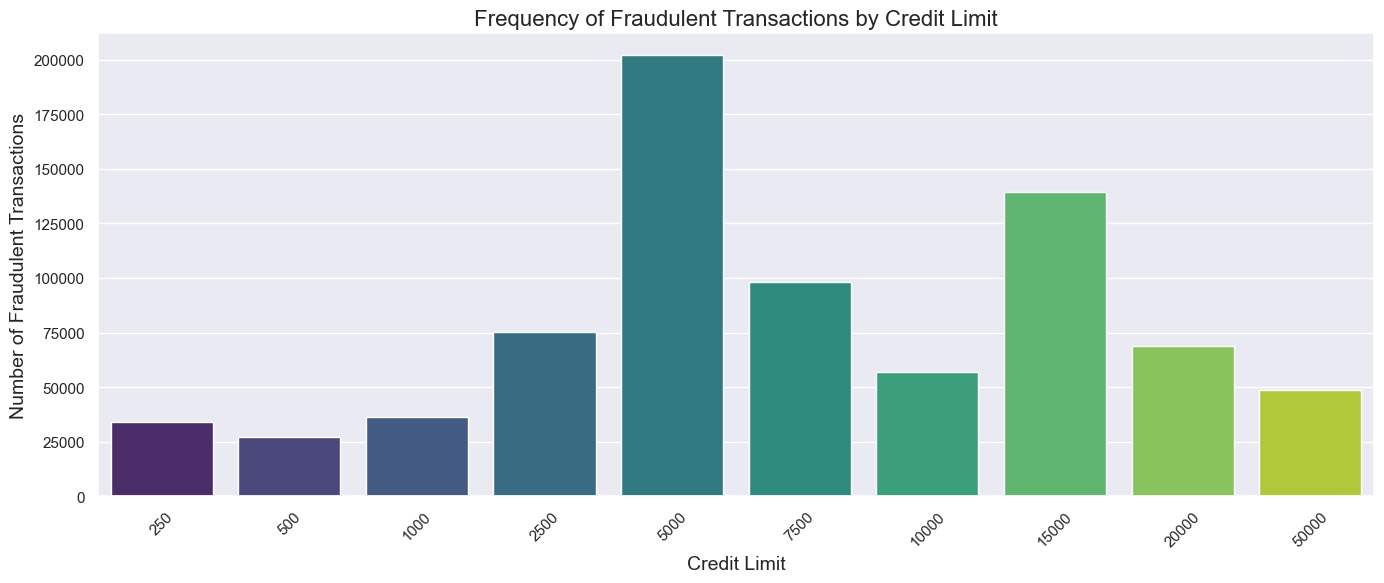

In [27]:
# Aggregate the frequency of 'isFraud' occurrences by 'creditLimit'
frequency_df = (
    df
    .groupby('creditLimit')['isFraud']
    .count()
    .reset_index(name='Frequency')
)

# Optional: Sort the DataFrame by 'Frequency' for better visualization
frequency_df = frequency_df.sort_values(by='Frequency', ascending=False)

# Initialize the matplotlib figure with a specified size
plt.figure(figsize=(14, 6))

# Create a bar plot using seaborn
ax = sns.barplot(
    data=frequency_df,
    x='creditLimit',
    y='Frequency',
    palette='viridis'  # Optional: Choose a color palette
)

# Enhance the plot with titles and labels
ax.set_title('Frequency of Fraudulent Transactions by Credit Limit', fontsize=16)
ax.set_xlabel('Credit Limit', fontsize=14)
ax.set_ylabel('Number of Fraudulent Transactions', fontsize=14)

# Rotate x-axis labels if necessary for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

## Report any structure you find and any hypotheses you have about that structure.

## Imbalance dataset

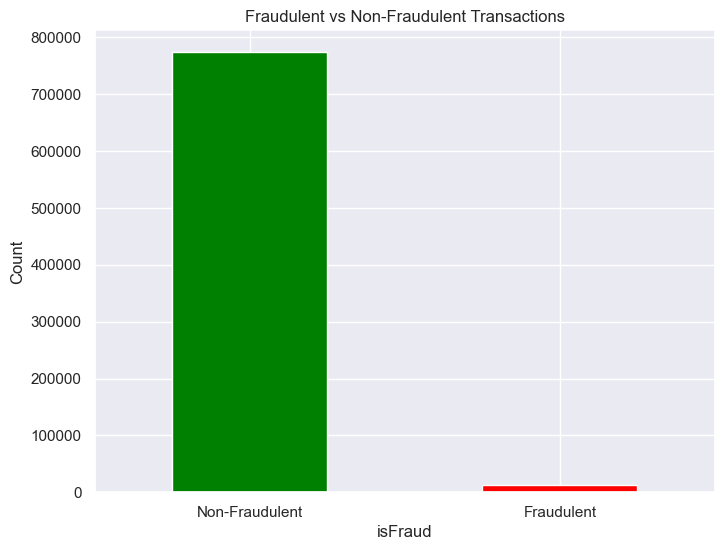

In [28]:
# Fraudulent vs. Non-Fraudulent transactions
fraud_counts = df['isFraud'].value_counts()
fraud_counts.plot(kind='bar', color=['green', 'red'], figsize=(8, 6))
plt.title('Fraudulent vs Non-Fraudulent Transactions')
plt.xticks(ticks=[0, 1], labels=['Non-Fraudulent', 'Fraudulent'], rotation=0)
plt.ylabel('Count')
plt.show()

## Correlation

**accountNumber and customerid are strongly correlated.**

**cardCVV and enteredCVV are strongly correlated.**

**high correlation among availableMoney, currentBalance, and credit limit**

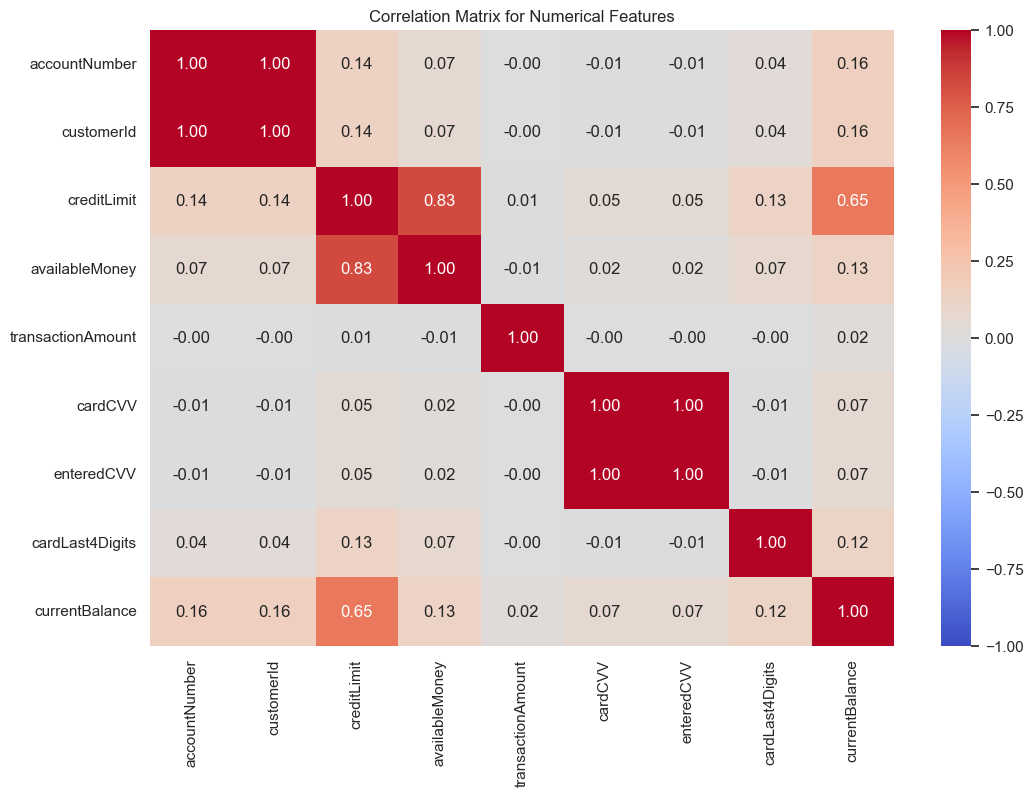

In [29]:
# Select only numeric columns for correlation analysis
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()

# Plot the corrected correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Numerical Features')
plt.show()

## 1: 1 Match Features

**check whether account number and customerID are 1:1 match. I will remove account number when we do feature engineering**

In [30]:
account=df.accountNumber.unique()
customer=df['customerId'].unique()
comparison = account== customer
equal_arrays = comparison.all()

In [31]:
print(equal_arrays)

True


**check whether enteredCVV and cardCVV are 1:1 match. I will create a new feature and remove both of CVV**

In [32]:
# Check if the enteredCVV matches cardCVV row by row
comparison = df['cardCVV'] == df['enteredCVV']

# Verify if all values match
all_match = comparison.all()

print("Do cardCVV and enteredCVV match 1:1 across all rows?", all_match)

Do cardCVV and enteredCVV match 1:1 across all rows? False


## Missing values in posEntryMode contains usefull information

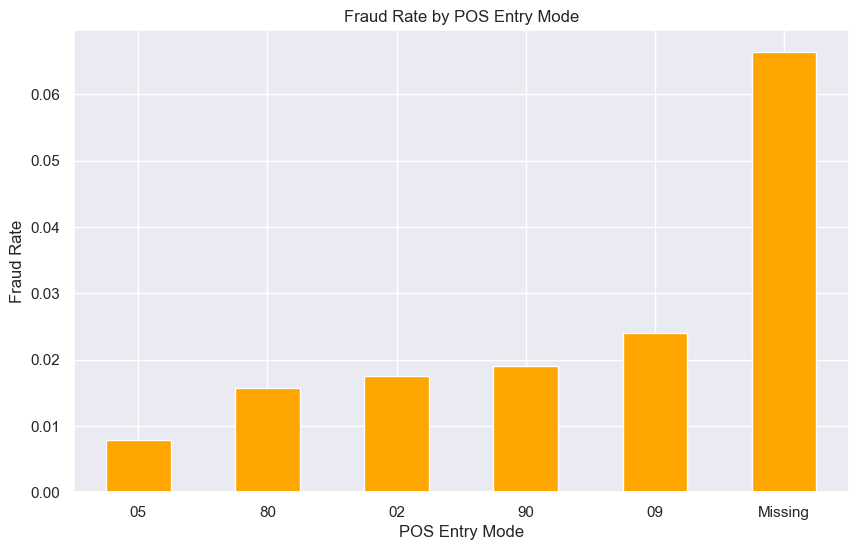

In [33]:
# Analyzing fraud by transaction entry mode (posEntryMode)
pos_entry_fraud = df.groupby('posEntryMode')['isFraud'].mean().sort_values()

plt.figure(figsize=(10, 6))
pos_entry_fraud.plot(kind='bar', color='orange')
plt.title('Fraud Rate by POS Entry Mode')
plt.xlabel('POS Entry Mode')
plt.ylabel('Fraud Rate')
plt.xticks(rotation=0)
plt.show()

## Certain POS entry modes experience higher fraud rates

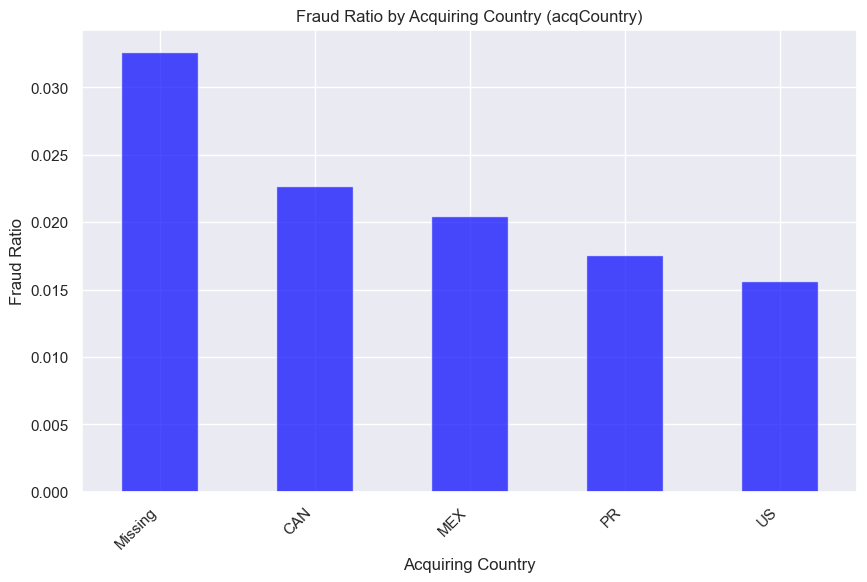

In [34]:
# Calculate fraud ratio by acqCountry
fraud_ratio_by_country = df.groupby('acqCountry')['isFraud'].mean().sort_values(ascending=False)

# Plot the fraud ratio by acqCountry
plt.figure(figsize=(10, 6))
fraud_ratio_by_country.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Fraud Ratio by Acquiring Country (acqCountry)')
plt.xlabel('Acquiring Country')
plt.ylabel('Fraud Ratio')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

## Missing values in transactionType contains usefull information

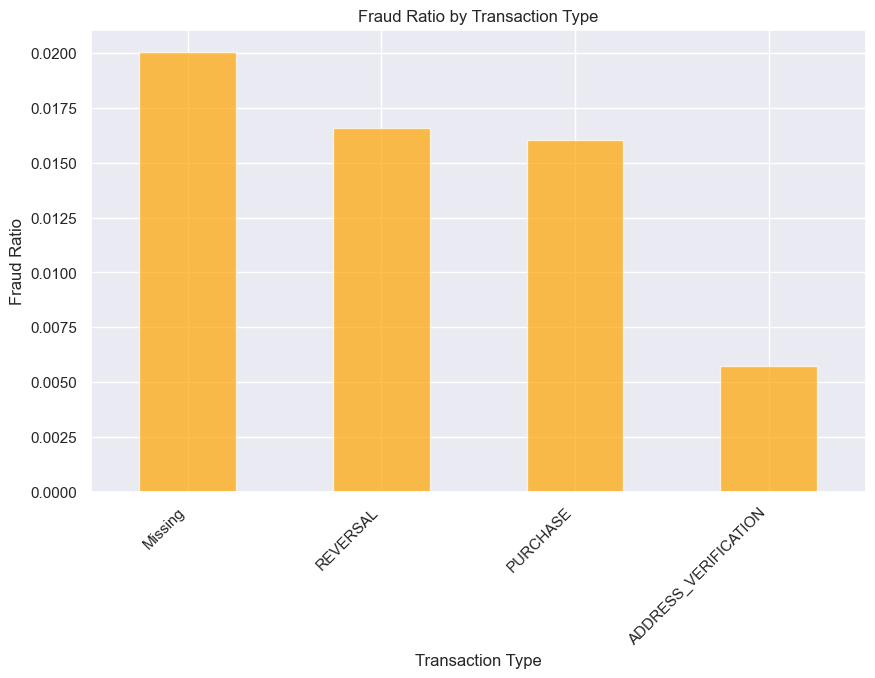

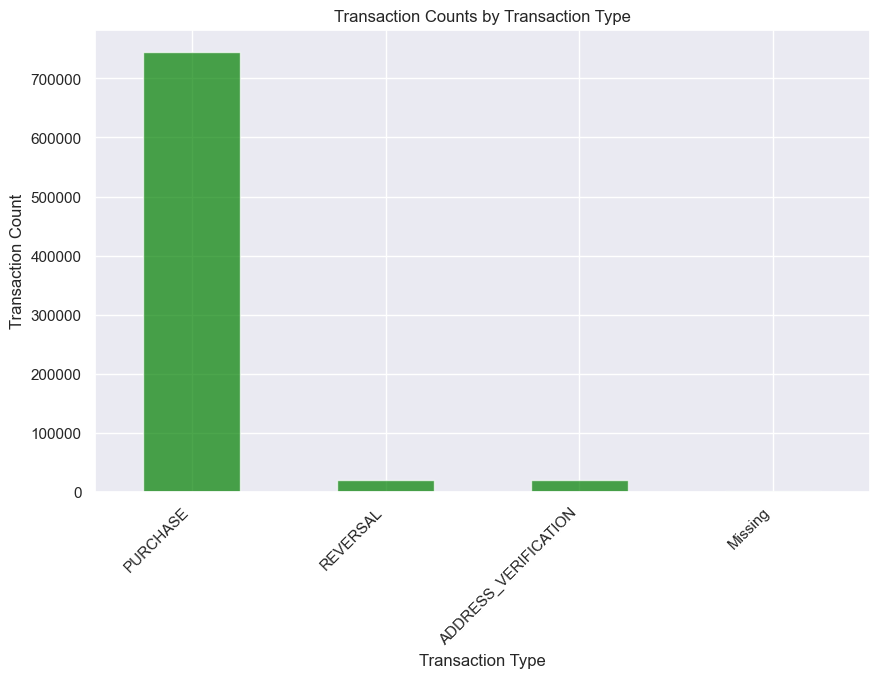

In [35]:
# Calculate fraud ratio by transactionType
fraud_ratio_by_transaction_type = df.groupby('transactionType')['isFraud'].mean().sort_values(ascending=False)

# Plot the fraud ratio by transactionType
plt.figure(figsize=(10, 6))
fraud_ratio_by_transaction_type.plot(kind='bar', color='orange', alpha=0.7)
plt.title('Fraud Ratio by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Fraud Ratio')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

# Calculate transaction counts by transactionType
transaction_count_by_type = df['transactionType'].value_counts()

# Plot the transaction counts by transactionType
plt.figure(figsize=(10, 6))
transaction_count_by_type.plot(kind='bar', color='green', alpha=0.7)
plt.title('Transaction Counts by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()


## Missing values in merchantCountryCode contains usefull information

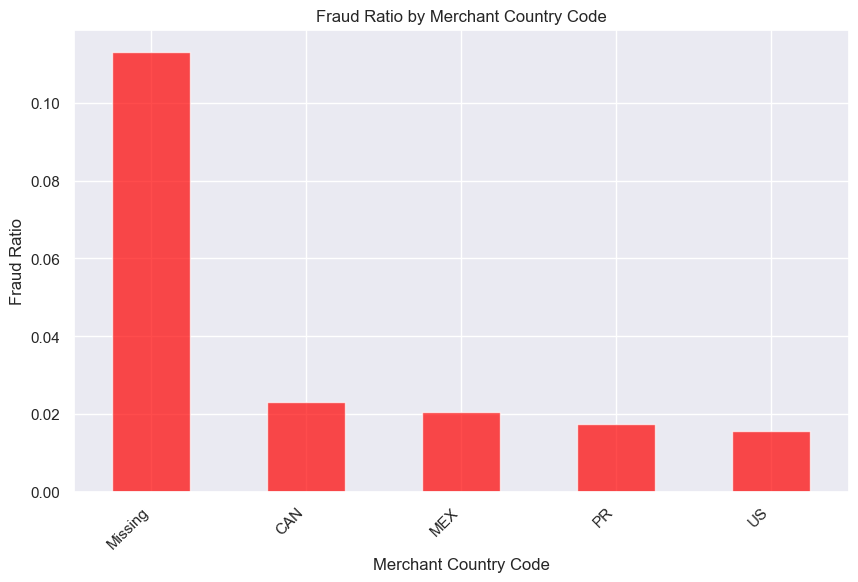

In [36]:
# Calculate fraud ratio by merchantCountryCode
fraud_ratio_by_merchant_country = df.groupby('merchantCountryCode')['isFraud'].mean().sort_values(ascending=False)

# Plot the fraud ratio by merchantCountryCode
plt.figure(figsize=(10, 6))
fraud_ratio_by_merchant_country.plot(kind='bar', color='red', alpha=0.7)
plt.title('Fraud Ratio by Merchant Country Code')
plt.xlabel('Merchant Country Code')
plt.ylabel('Fraud Ratio')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()


## Missing values in posConditionCode contains usefull information

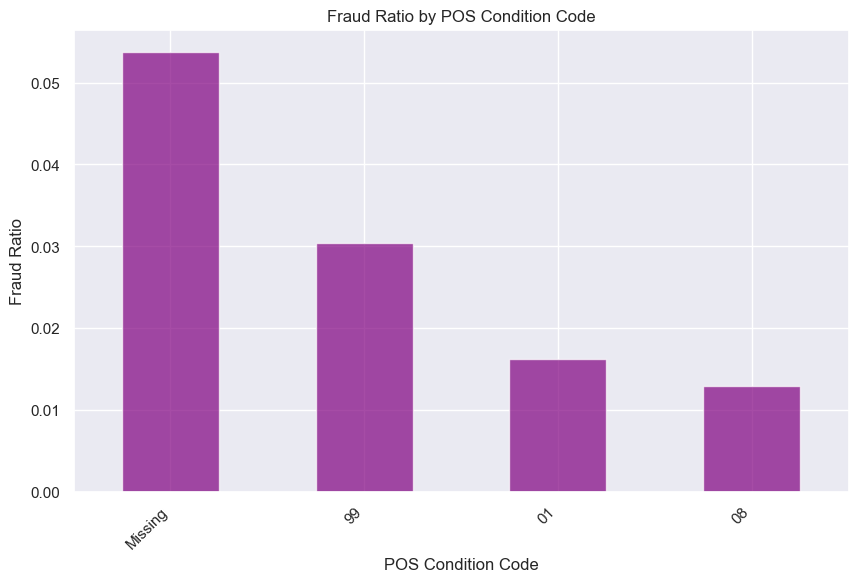

In [37]:
# Calculate fraud ratio by posConditionCode
fraud_ratio_by_pos_condition = df.groupby('posConditionCode')['isFraud'].mean().sort_values(ascending=False)

# Plot the fraud ratio by posConditionCode
plt.figure(figsize=(10, 6))
fraud_ratio_by_pos_condition.plot(kind='bar', color='purple', alpha=0.7)
plt.title('Fraud Ratio by POS Condition Code')
plt.xlabel('POS Condition Code')
plt.ylabel('Fraud Ratio')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

## Distribution of transactions by merchantName (Top 10 merchants by count)

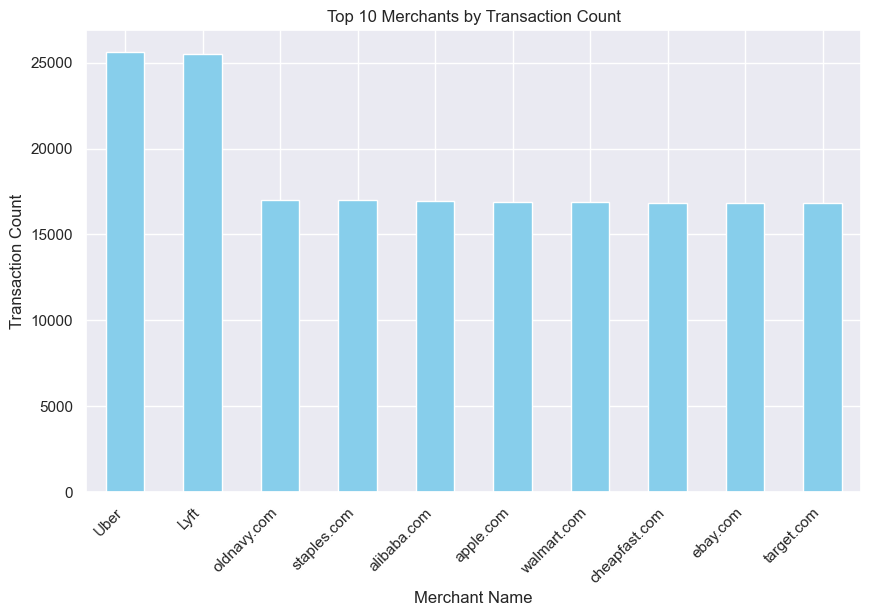

In [38]:

top_merchants = df['merchantName'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_merchants.plot(kind='bar', color='skyblue')
plt.title('Top 10 Merchants by Transaction Count')
plt.xlabel('Merchant Name')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45, ha='right')
plt.show()

## Fraud rate by credit limit ranges

C:\Users\wangj\AppData\Local\Temp\ipykernel_34776\351005756.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_rate_by_credit_limit = df.groupby('creditLimitRange')['isFraud'].mean()


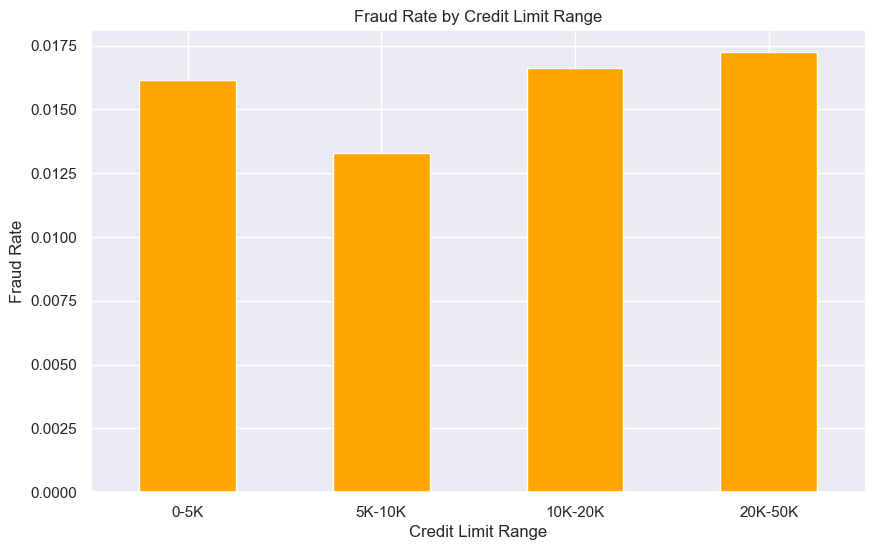

In [39]:
df['creditLimitRange'] = pd.cut(
    df['creditLimit'],
    bins=[0, 5000, 10000, 20000, 50000],
    labels=['0-5K', '5K-10K', '10K-20K', '20K-50K']
)

fraud_rate_by_credit_limit = df.groupby('creditLimitRange')['isFraud'].mean()

plt.figure(figsize=(10, 6))
fraud_rate_by_credit_limit.plot(kind='bar', color='orange')
plt.title('Fraud Rate by Credit Limit Range')
plt.xlabel('Credit Limit Range')
plt.ylabel('Fraud Rate')
plt.xticks(rotation=0)
plt.show()

## Transactions over time

No seasonality.
Increasing trend in transaction count.
No trend in fraud counts

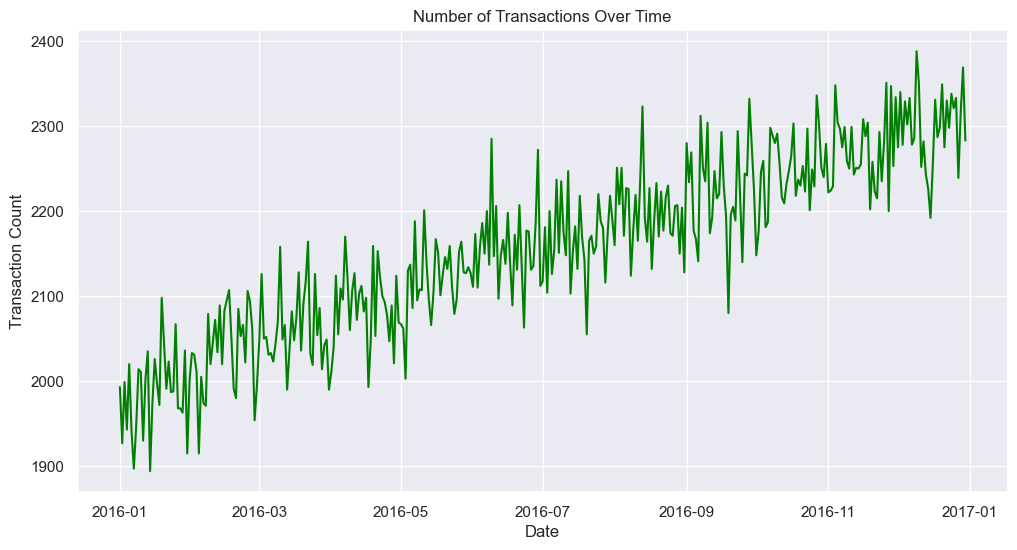

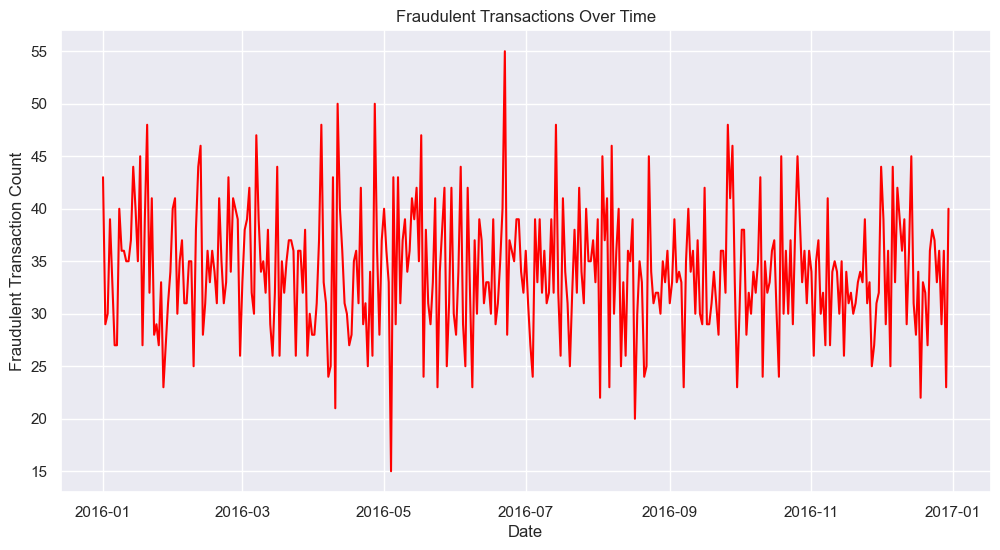

In [40]:
# EDA: Transactions over time
df['transactionDateTime'] = pd.to_datetime(df['transactionDateTime'])
df['transactionDate'] = df['transactionDateTime'].dt.date

transactions_over_time = df.groupby('transactionDate').size()

plt.figure(figsize=(12, 6))
transactions_over_time.plot(kind='line', color='green')
plt.title('Number of Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Transaction Count')
plt.show()

# EDA: Fraudulent transactions over time
fraud_over_time = df[df['isFraud'] == True].groupby('transactionDate').size()

plt.figure(figsize=(12, 6))
fraud_over_time.plot(kind='line', color='red')
plt.title('Fraudulent Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Fraudulent Transaction Count')
plt.show()

## Fraud rate by merchant category

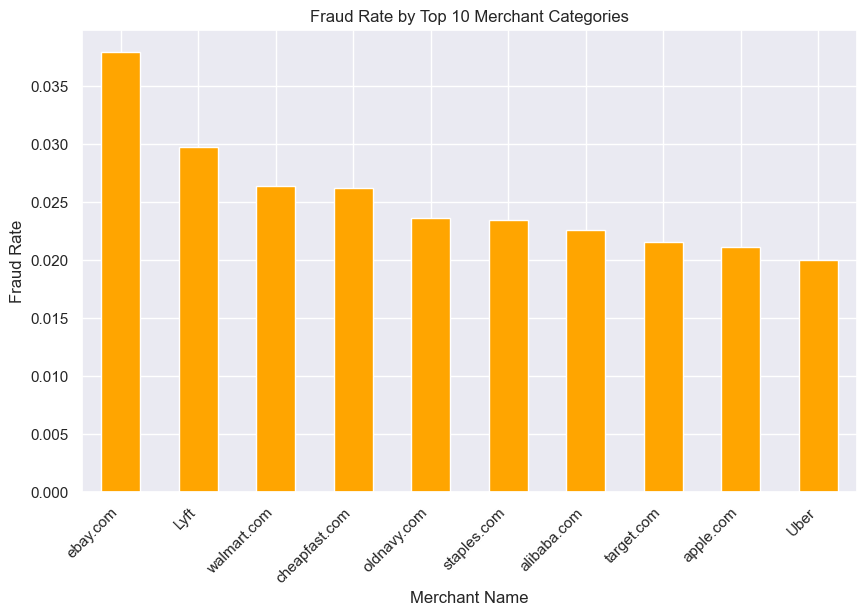

In [41]:
# EDA: Analyzing fraud rate by merchant category (Top 10 categories by count)
top_merchant_categories = df['merchantName'].value_counts().head(10).index
fraud_rate_by_category = (
    df[df['merchantName'].isin(top_merchant_categories)]
    .groupby('merchantName')['isFraud']
    .mean()
)
plt.figure(figsize=(10, 6))
fraud_rate_by_category.sort_values(ascending=False).plot(kind='bar', color='orange')
plt.title('Fraud Rate by Top 10 Merchant Categories')
plt.xlabel('Merchant Name')
plt.ylabel('Fraud Rate')
plt.xticks(rotation=45, ha='right')
plt.show()


## Fraud rate by card present indicator

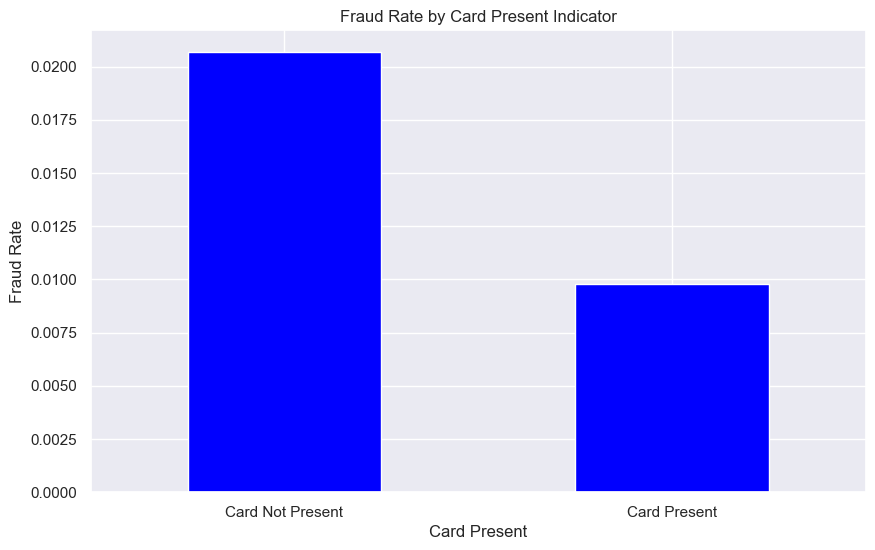

In [42]:
# EDA: Analyzing fraud rate by card present indicator
fraud_rate_by_card_present = df.groupby('cardPresent')['isFraud'].mean()

# Correcting the Fraud Rate by Card Present Indicator plot with proper ticks and labels
plt.figure(figsize=(10, 6))
fraud_rate_by_card_present.plot(kind='bar', color='blue')
plt.title('Fraud Rate by Card Present Indicator')
plt.xlabel('Card Present')
plt.ylabel('Fraud Rate')
plt.xticks(ticks=[0, 1], labels=['Card Not Present', 'Card Present'], rotation=0)
plt.show()


 ## Distribution of fraud by merchant category

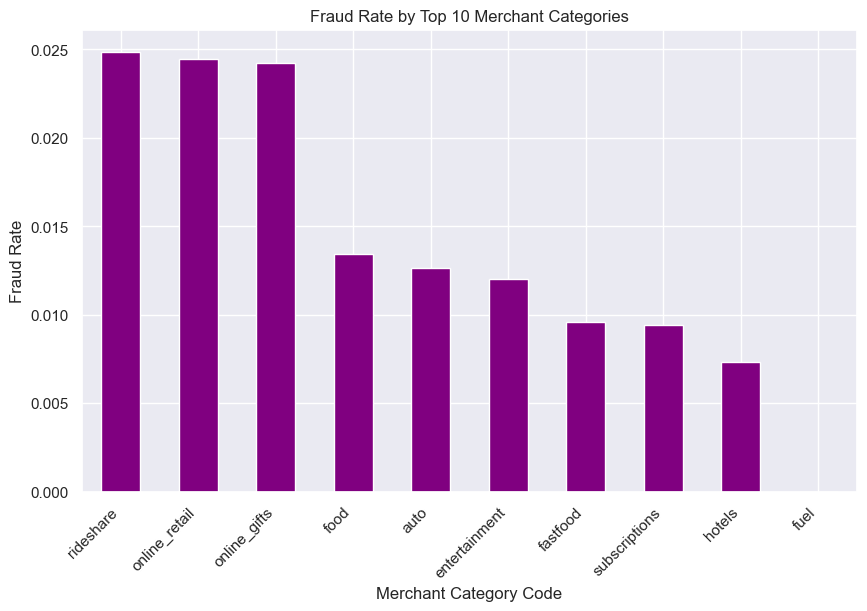

In [43]:
# EDA: Distribution of fraud by merchant category (Top 10 categories)
top_merchant_categories = df['merchantCategoryCode'].value_counts().head(10).index
fraud_rate_by_category = (
    df[df['merchantCategoryCode'].isin(top_merchant_categories)]
    .groupby('merchantCategoryCode')['isFraud']
    .mean()
)

plt.figure(figsize=(10, 6))
fraud_rate_by_category.sort_values(ascending=False).plot(kind='bar', color='purple')
plt.title('Fraud Rate by Top 10 Merchant Categories')
plt.xlabel('Merchant Category Code')
plt.ylabel('Fraud Rate')
plt.xticks(rotation=45, ha='right')
plt.show()

## Some cardsLast4Digits are related to higher fraud ratio.

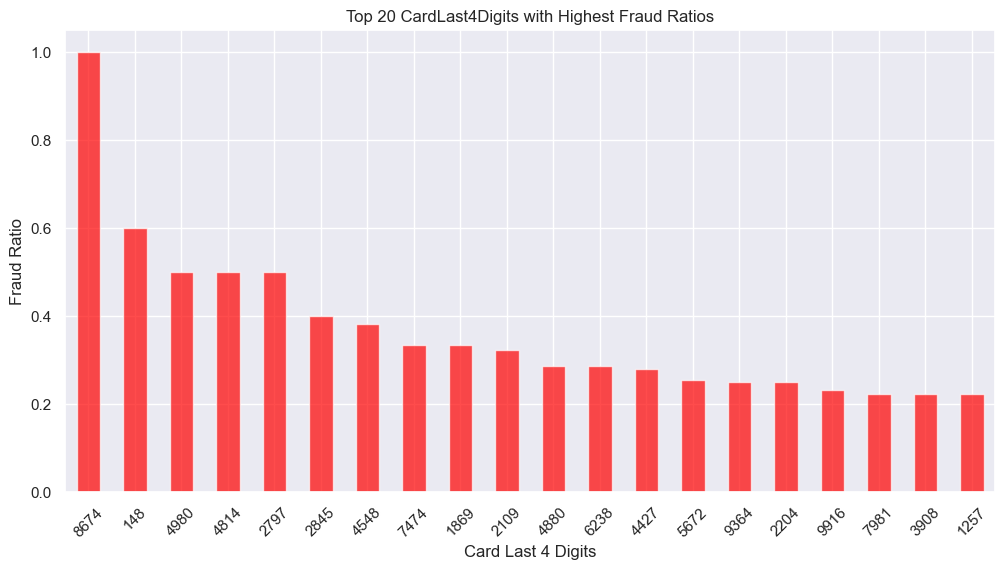

In [44]:
# Group by 'cardLast4Digits' to calculate the fraud ratio
fraud_ratio_by_card = df.groupby('cardLast4Digits')['isFraud'].mean().sort_values(ascending=False)

# Filter for meaningful analysis (ignoring any invalid or null cardLast4Digits)
fraud_ratio_by_card = fraud_ratio_by_card[fraud_ratio_by_card.index.notnull()]

# Plot the fraud ratio by cardLast4Digits
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
fraud_ratio_by_card.head(20).plot(kind='bar', color='red', alpha=0.7)
plt.title('Top 20 CardLast4Digits with Highest Fraud Ratios')
plt.xlabel('Card Last 4 Digits')
plt.ylabel('Fraud Ratio')
plt.xticks(rotation=45)
plt.show()

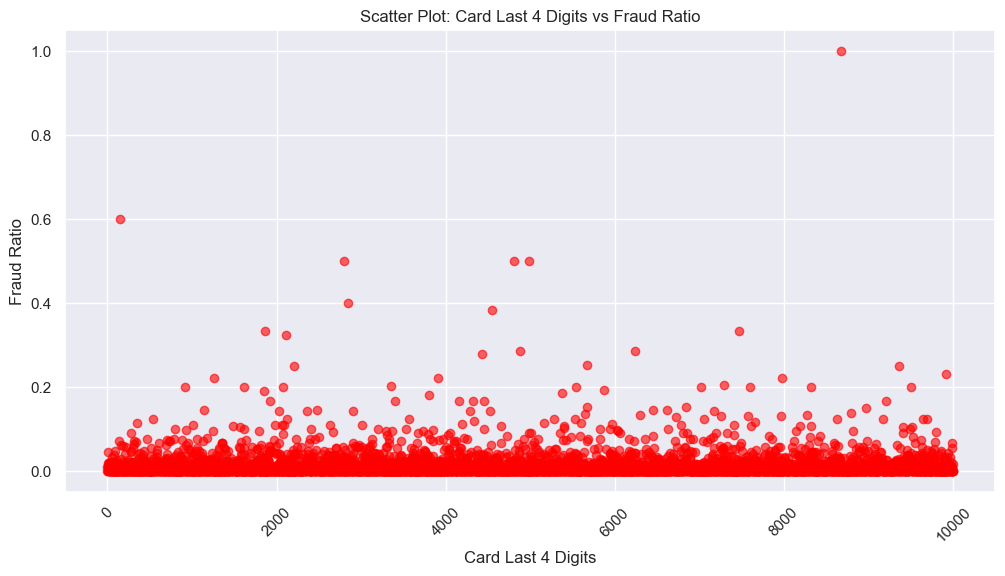

In [45]:
# Prepare data for scatter plot
card_fraud_data = df.groupby('cardLast4Digits')['isFraud'].mean().reset_index()
card_fraud_data = card_fraud_data[card_fraud_data['cardLast4Digits'].notnull()]  # Remove nulls

# Plot scatter plot of cardLast4Digits vs Fraud Ratio
plt.figure(figsize=(12, 6))
plt.scatter(card_fraud_data['cardLast4Digits'], card_fraud_data['isFraud'], alpha=0.6, color='red')
plt.title('Scatter Plot: Card Last 4 Digits vs Fraud Ratio')
plt.xlabel('Card Last 4 Digits')
plt.ylabel('Fraud Ratio')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()